In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [6]:
# Load the data
data = pd.read_csv("Nat_Gas.csv")

# Display the first few rows
data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [7]:
# Convert 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

data.head()

C:\Users\rmnf\AppData\Local\Temp\ipykernel_16208\1084433887.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


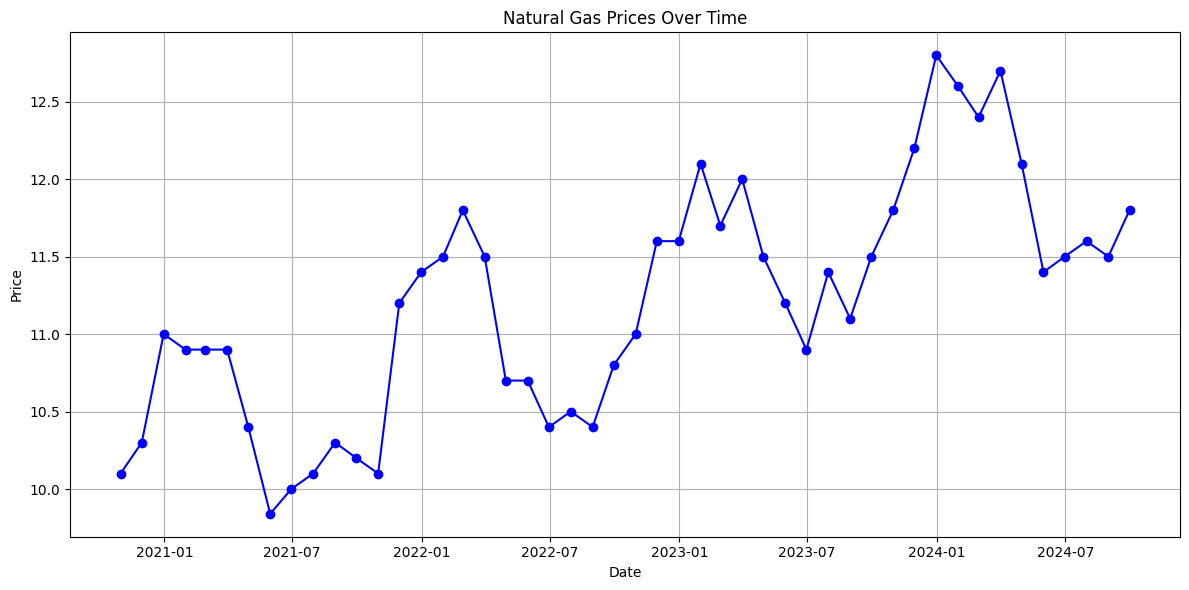

In [8]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-', color='b')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Set the date as the index for the time series decomposition
data.set_index('Dates', inplace=True)

data.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


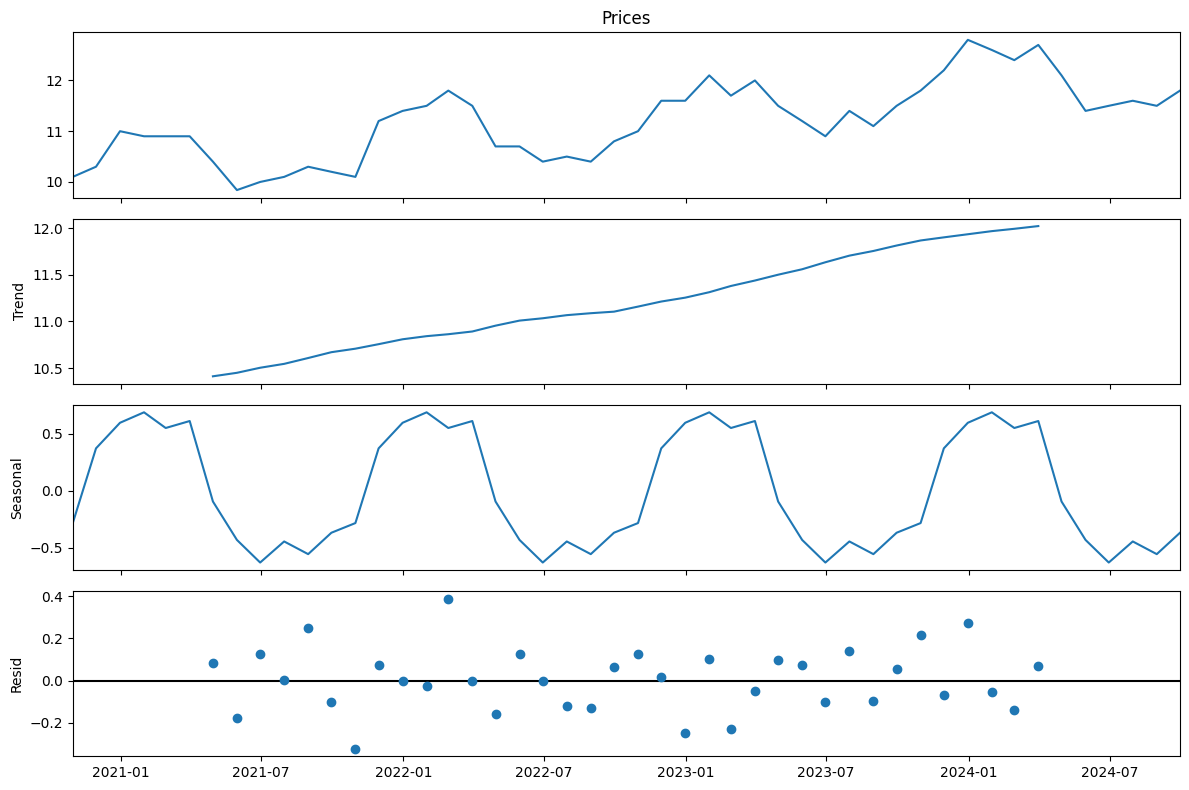

In [14]:
# Decompose the time series
result = seasonal_decompose(data['Prices'], model='additive', period=12)

# Plot the decomposed components
fig = result.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

# Confirmar período estatisticamente

In [18]:
# Define the p, d, q, P, D, Q, and s parameters to take any value between 0 and 1
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # yearly seasonality

# Generate all different combinations of p, d, q, P, D, Q and s triplets
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(product(P, D, Q))]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
# Search for the best parameters
best_aic = float('inf')
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(data['Prices'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

best_params, best_seasonal_params

c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

((0, 1, 1), (0, 1, 1, 12))

# Explicação, análise, retirar warnings e justificar os limites dos parâmetros e o modelo

In [20]:
# Fit the SARIMA model with the best parameters
mod = SARIMAX(data['Prices'],
              order=best_params,
              seasonal_order=best_seasonal_params,
              enforce_stationarity=False,
              enforce_invertibility=False)
results = mod.fit()

# Forecast for one year into the future
forecast = results.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\rmnf\Anaconda3\envs\jpmorgan\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


(<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper at 0x1a7ff8fb690>,
 2024-10-31    11.973635
 2024-11-30    12.615573
 2024-12-31    12.990573
 2025-01-31    13.065573
 2025-02-28    12.990573
 2025-03-31    13.065573
 2025-04-30    12.465573
 2025-05-31    12.075573
 2025-06-30    11.990573
 2025-07-31    12.190573
 2025-08-31    12.115573
 2025-09-30    12.365573
 Freq: M, Name: predicted_mean, dtype: float64,
             lower Prices  upper Prices
 2024-10-31     11.560593     12.386677
 2024-11-30     12.197669     13.033477
 2024-12-31     12.562033     13.419113
 2025-01-31     12.626654     13.504492
 2025-02-28     12.541515     13.439631
 2025-03-31     12.606600     13.524546
 2025-04-30     11.996895     12.934251
 2025-05-31     11.597386     12.553760
 2025-06-30     11.503063     12.478083
 2025-07-31     11.693915     12.687231
 2025-08-31     11.609933     12.621213
 2025-09-30     11.851107     12.880039)

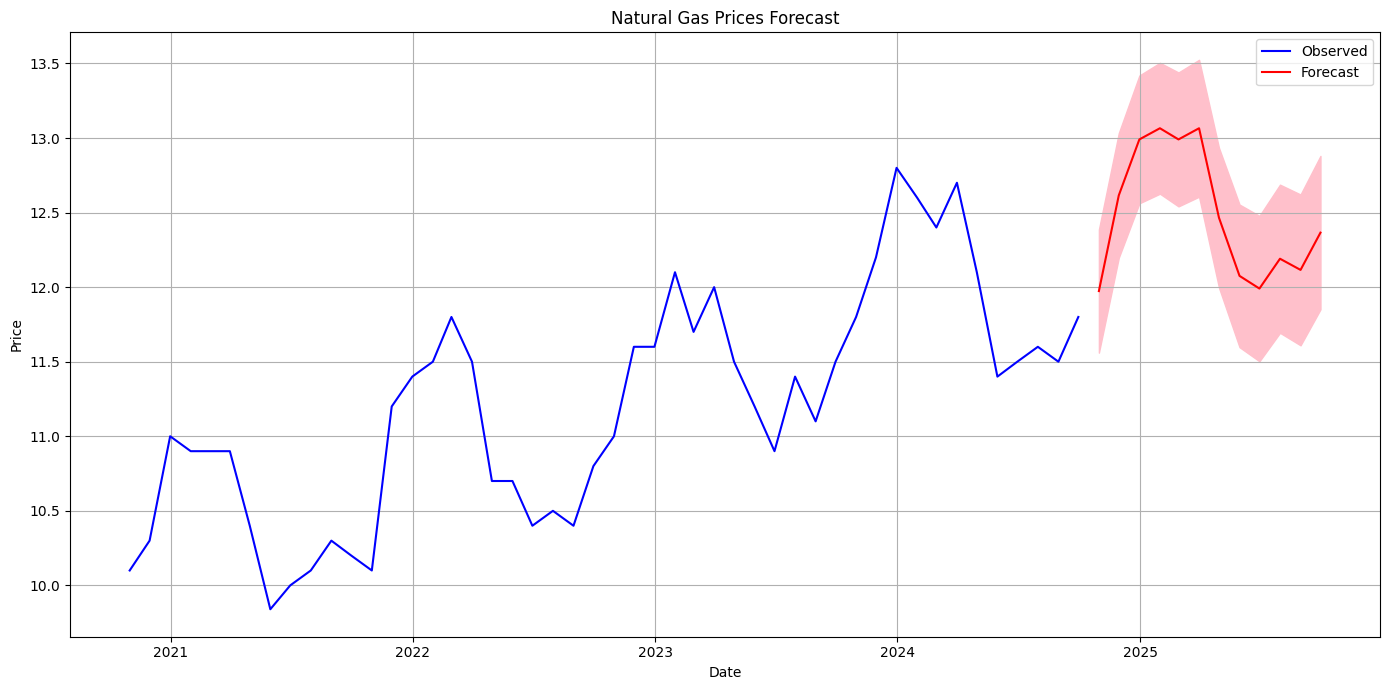

In [21]:
# Plot the past data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Prices'], label='Observed', color='b')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='r')
plt.fill_between(confidence_intervals.index, confidence_intervals['lower Prices'], 
                 confidence_intervals['upper Prices'], color='pink')
plt.title('Natural Gas Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicação do modelo e dos parâmetros e justificar os limites dos parâmetros e o modelo (por que não usar um modelo mais complexo?)

In [22]:
def get_price_estimate(date_str):
    """
    Get the price estimate for a given date.
    
    Parameters:
    - date_str (str): Date in the format 'YYYY-MM-DD'
    
    Returns:
    - float or str: Price estimate or message if the date is outside the range
    """
    date = pd.to_datetime(date_str)
    
    if date in data.index:
        return data.loc[date, 'Prices']
    elif date in mean_forecast.index:
        return mean_forecast[date]
    else:
        return "Date is outside the forecast range."

In [23]:
# Test the function for a few dates
test_dates = ["2023-09-30", "2024-06-30", "2025-01-30"]
price_estimates = [get_price_estimate(date) for date in test_dates]

test_dates, price_estimates

(['2023-09-30', '2024-06-30', '2025-01-30'],
 [11.5, 11.5, 'Date is outside the forecast range.'])

In [24]:
get_price_estimate("2022-01-01")

'Date is outside the forecast range.'

# Precisa estimar em dias intermediários no passado